In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [21]:
df = pd.read_csv("..\data\world_ampas_oscar_winner_demographics.csv")

In [ ]:
# Preenche a data de nascimento de Tom Hooper 
df.loc[(df['name'] == 'Tom Hooper') & (df['birth_date'].isnull()), 'birth_date'] = '1972-10-05'

# Preenchendo os nulos do campo de religião
df.loc[(df['religion'].isnull()), 'religion'] = 'No declared religion'

# Criando coluna de década
df['decade'] = (df['year_edition'] // 10) * 10

# Criando a coluna de brancos e não brancos
df['white_group'] = df['race_ethnicity'].apply(lambda x: 'White' if x == 'White' else 'Not White')

# Criando campo de idade
df['age'] = df['year_edition'] - df['birth_year']

# Criando faixa etária 
df['age_group'] = np.select([df['age'] <= 18,(df['age'] >= 19) & (df['age'] < 65),df['age'] >= 65], ['young', 'adults', 'elderly'])

# Criando faixa de idade  
df['age_range'] = np.select([df['age'] <= 19,(df['age'] >= 20) & (df['age'] <= 35), (df['age'] >= 36) & (df['age'] <= 50), df['age'] > 50], ['0-19','20-35','36-50','51+'])


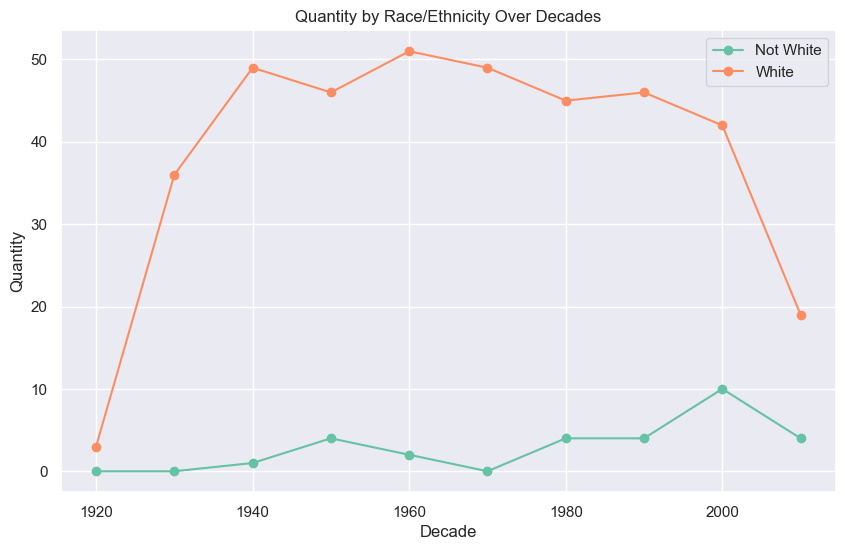

In [23]:
sns.set_theme()

df_white = df.groupby(['white_group','decade']).size().reset_index(name='qtd')

# Pivot para ter cada raça como coluna
df_pivot = df_white.pivot(index="decade", columns="white_group", values="qtd").fillna(0)

# Mudando paleta de cores 
palette = sns.color_palette("Set2", n_colors=len(df_pivot.columns))

# Plot
fig, ax = plt.subplots(figsize=(10,6))
for i, col in enumerate(df_pivot.columns):
    ax.plot(df_pivot.index, df_pivot[col], marker='o', label=col, color=palette[i])

ax.set_xlabel("Decade")
ax.set_ylabel("Quantity")
ax.set_title("Quantity by Race/Ethnicity Over Decades")
ax.legend()

# Salvar o plot
plt.savefig("../plots/qtd_por_raca.png", dpi=300, bbox_inches='tight')
plt.show()


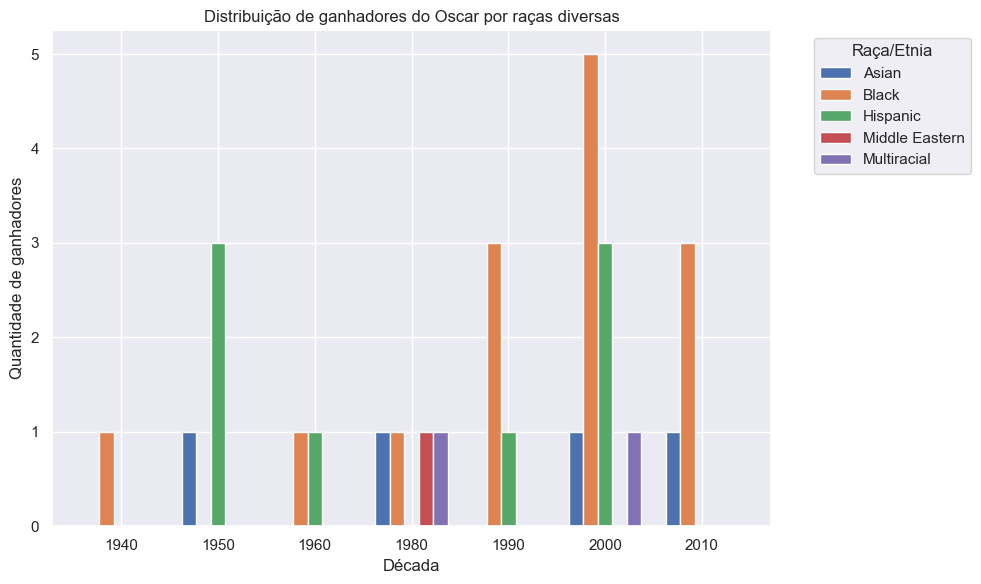

In [24]:
# criando dataframe para analise de correlação entre raça e ano de edição do Oscar 
df_race = df[df['white_group'] == 'Not White']
df_race = df_race.groupby(['race_ethnicity', 'decade']).size().reset_index(name='qtd') 


# Cria a tabela pivoteada (linhas = década, colunas = raça, valores = qtd)
df_pivot = df_race.pivot(index='decade', columns='race_ethnicity', values='qtd').fillna(0)


# Configurações do gráfico
x = np.arange(len(df_pivot.index))  # posições no eixo X
width = 0.15  # largura de cada barra
fig, ax = plt.subplots(figsize=(10, 6))

# Cria as barras lado a lado
for i, race in enumerate(df_pivot.columns):
    ax.bar(x + i * width, df_pivot[race], width, label=race)

# Personalizações
ax.set_xlabel('Década')
ax.set_ylabel('Quantidade de ganhadores')
ax.set_title('Distribuição de ganhadores do Oscar por raças diversas')
ax.set_xticks(x + width * (len(df_pivot.columns)-1)/2)
ax.set_xticklabels(df_pivot.index)
ax.legend(title='Raça/Etnia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.savefig("../plots/qtd_por_diversidade.png", dpi=300, bbox_inches='tight')
plt.show()

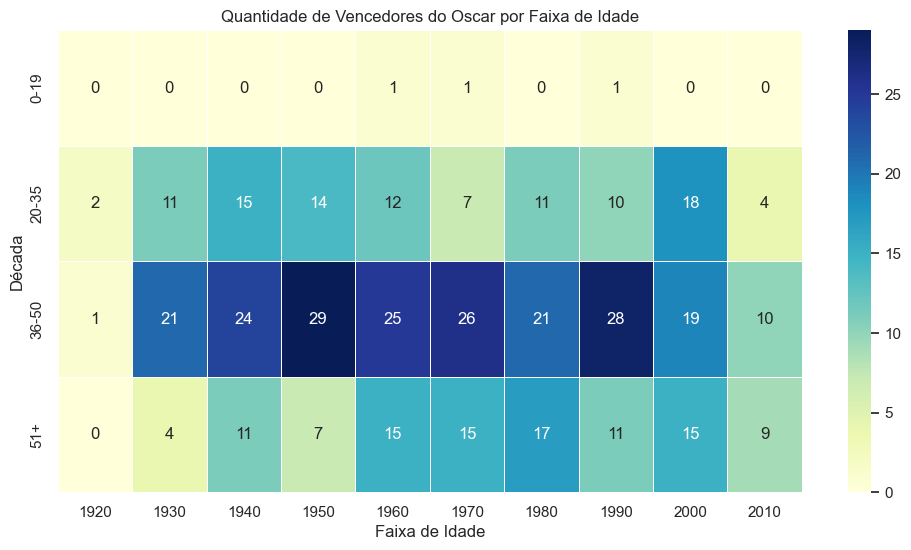

In [25]:
df_age = df.groupby(['age_range', 'decade']).size().reset_index(name='qtd') 
# Pivot para ter cada faixa de idade como coluna
df_pivot = df_age.pivot(index='age_range', columns='decade', values='qtd').fillna(0)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.title("Quantidade de Vencedores do Oscar por Faixa de Idade")
plt.xlabel("Faixa de Idade")
plt.ylabel("Década")

plt.savefig("../plots/qtd_por_faixa_idade.png", dpi=300, bbox_inches='tight')
plt.show()

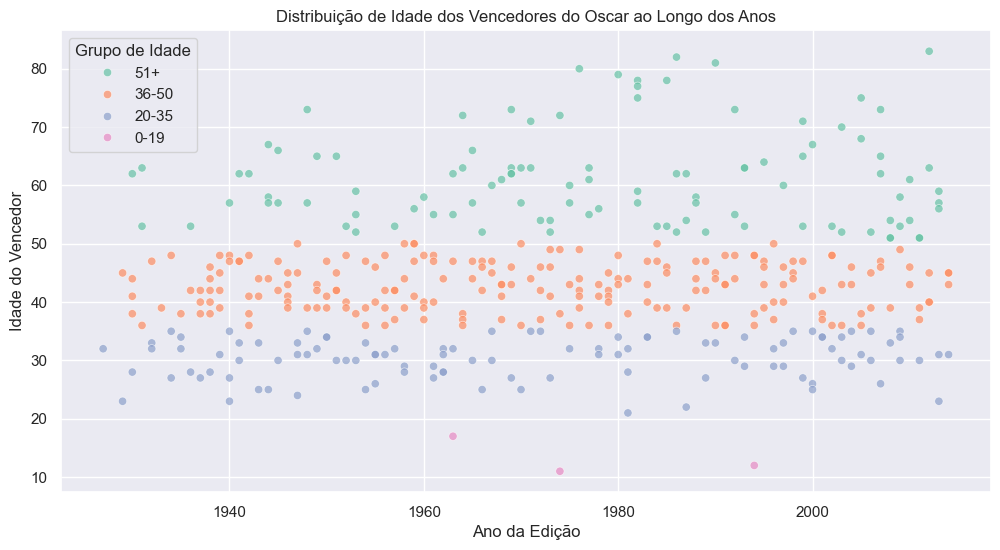

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='year_edition', y='age', hue='age_range', palette='Set2', alpha=0.7)
plt.xlabel('Ano da Edição')
plt.ylabel('Idade do Vencedor')
plt.title('Distribuição de Idade dos Vencedores do Oscar ao Longo dos Anos')
plt.legend(title='Grupo de Idade')

plt.savefig("../plots/qtd_por_idade.png", dpi=300, bbox_inches='tight')
plt.show()